<a href="https://colab.research.google.com/github/Hikaros/ML-Forex-Time-Series-Predictions/blob/master/Peak_Values_Predictions_v1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# from google.colab import files
# files.upload()
!ls
# !rm EURUSD.csv

 Convert_Series_To_Supervised_Learning.py
 EURUSD.csv
'GBP_USD Historical Data.csv'
 Hikaros_forex_functions.py
 sample_data
 technical_indicators.py
'USD_CHF Historical Data.csv'
'US Dollar Index Historical Data.csv'


In [4]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

TensorFlow 2.x selected.


In [5]:
import math
import time
import datetime
import os
import numpy as np
import pandas as pd
from Hikaros_forex_functions import dukascopy_data_man
from Convert_Series_To_Supervised_Learning import series_to_supervised
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Bidirectional
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from scipy.signal import argrelextrema
from keras.layers import Embedding
from pandas import DataFrame
from pandas import read_csv
from datetime import datetime
from technical_indicators import relative_strength_index
from technical_indicators import donchian_channel
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, BatchNormalization
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint, ModelCheckpoint
import tensorflow as tf

Using TensorFlow backend.


In [0]:
USDX=read_csv("US Dollar Index Historical Data.csv")
USDX['Date'] = pd.to_datetime(USDX['Date'])
USDX = USDX.set_index(USDX["Date"])
# USDX.drop(["Date","Open","High","Low"],axis=1,inplace=True)


USDCHF=read_csv('USD_CHF Historical Data.csv')
USDCHF['Date'] = pd.to_datetime(USDCHF['Date'])
USDCHF = USDCHF.set_index(USDCHF["Date"])
# USDCHF.drop(["Date","Open","High","Low"],axis=1,inplace=True)

In [0]:
# Dataset
dataset = read_csv("EURUSD.csv")
# Set RSI
# dataset["RSI"]=relative_strength_index(dataset,14)["RSI_14"]
# dataset["Don_Channel"] = donchian_channel(dataset,14)["Donchian_14"]
# dataset["Don_Channel"] = dataset["Don_Channel"].replace(0,0.0469)
# print(Don)
# dataset["USDX"] = USDX["Close"]
# dataset["GBPUSD"] = GBPUSD["Close"]
# index Date
dataset["Date"]=pd.to_datetime(dataset["Date"],format="%Y.%m.%d")
dataset = dataset.set_index(dataset["Date"])
dataset.drop(["Date","Open","High","Low"],axis=1,inplace=True)

# Add Varialbles
# dataset["USDX"] = USDX["Close"]
# dataset["USDCHF"] = USDCHF["Close"]
# dataset["GBPUSD"] = GBPUSD["Close"]
# dataset["EURUSD"] = dataset["Close"]

# Fill zeros
# dataset['RSI'].fillna(method='bfill', inplace=True)/
# dataset['USDX'].fillna(method='ffill', inplace=True)
# dataset['USDCHF'].fillna(method='ffill', inplace=True)
# dataset['USDCHF'].fillna(method='bfill', inplace=True)
# dataset['GBPUSD'].fillna(method='ffill', inplace=True)
# dataset['GBPUSD'].fillna(method='bfill', inplace=True)
n_features=dataset.shape[1]
# dataset

In [8]:
price = dataset.values[:,0].copy()

max_idx = list(argrelextrema(price, np.greater, order=10)[0])
min_idx = list(argrelextrema(price, np.less, order=10)[0])
idx = max_idx + min_idx
idx.sort()
peaks=price[idx]

for i in range(len(price)):
  if i not in idx: 
    price[i] =np.nan
  
print(price)
dataset["Peaks"] = price
dataset['Peaks'].fillna(method='ffill', inplace=True)
dataset['Peaks'].fillna(method='bfill', inplace=True)
# dataset['USDX'].fillna(method='ffill', inplace=True)
dataset

[   nan 1.1309    nan ...    nan    nan    nan]


,Close,Peaks
Date,,
1990-01-01,1.14260,1.13090
1990-01-02,1.13090,1.13090
1990-01-03,1.16720,1.13090
1990-01-04,1.15920,1.13090
1990-01-07,1.17240,1.17240
...,...,...
2019-12-31,1.12154,1.12154
2020-01-02,1.11712,1.12154
2020-01-03,1.11564,1.12154


In [9]:
n_features=dataset.shape[1]
n_features

2

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


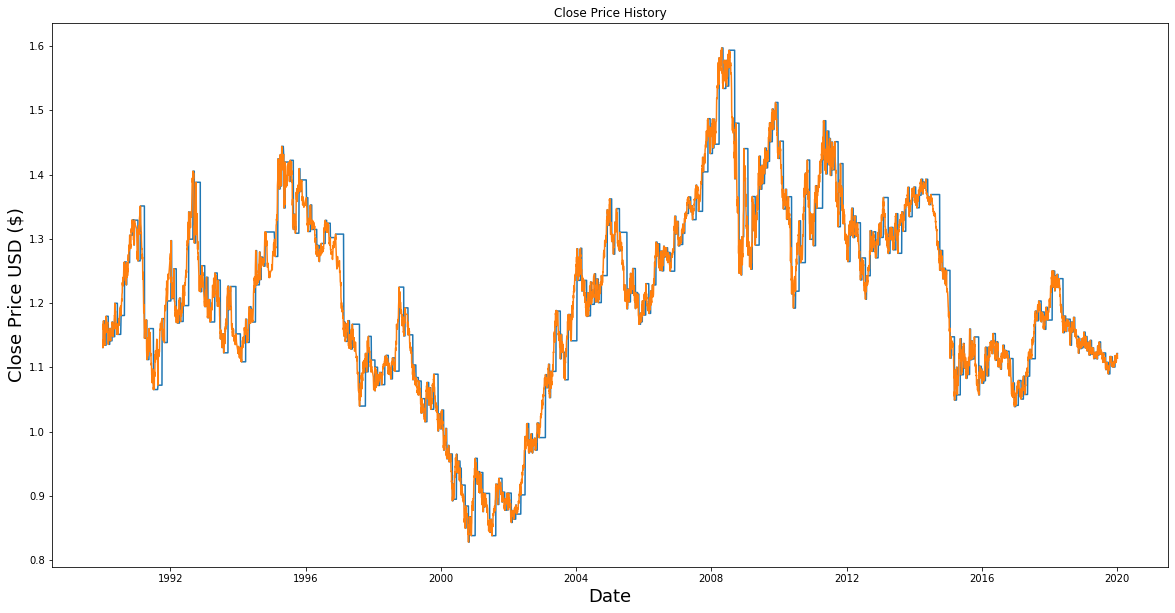

In [10]:
#Visualize the closing price history
plt.figure(figsize=(20,10))
plt.title('Close Price History')
plt.plot(dataset["Peaks"])
plt.plot(dataset["Close"])
# plt.plot(dataset["GBPUSD"])
# plt.plot(dataset["USDX"]*0.01)
# plt.plot(dataset["USDCHF"])
# plt.plot(dataset[["Peaks","Close"]][-200:])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [11]:
# ensure all data is float
values = dataset.values
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

# specify the number of lag hours
n_hours = 1

# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed)

# drop columns we don't want to predict
reframed.drop(reframed.columns[-n_features:-1], axis=1, inplace=True)
print(reframed)
print(reframed["var1(t-1)"])
reframed.shape


      var1(t-1)  var2(t-1)   var1(t)   var2(t)
1      0.408890   0.393683  0.393683  0.393683
2      0.393683   0.393683  0.440863  0.393683
3      0.440863   0.393683  0.430465  0.393683
4      0.430465   0.393683  0.447621  0.447621
5      0.447621   0.447621  0.440863  0.447621
...         ...        ...       ...       ...
8772   0.379465   0.377333  0.381518  0.381518
8773   0.381518   0.381518  0.375773  0.381518
8774   0.375773   0.381518  0.373850  0.381518
8775   0.373850   0.381518  0.378906  0.381518
8776   0.378906   0.381518  0.372095  0.381518

[8776 rows x 4 columns]
      var1(t-1)  var2(t-1)   var2(t)
1      0.408890   0.393683  0.393683
2      0.393683   0.393683  0.393683
3      0.440863   0.393683  0.393683
4      0.430465   0.393683  0.447621
5      0.447621   0.447621  0.447621
...         ...        ...       ...
8772   0.379465   0.377333  0.381518
8773   0.381518   0.381518  0.381518
8774   0.375773   0.381518  0.381518
8775   0.373850   0.381518  0.381518
8776

(8776, 3)

In [22]:
# split into train and test sets
values = reframed.values
n_train_hours = int(values.shape[0]/8776*7000)
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, -1]
test_X, test_y = test[:, :n_obs], test[:, -1]
print(train_X.shape, len(train_X), train_y.shape)

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(7000, 2) 7000 (7000,)
(7000, 1, 2) (7000,) (1776, 1, 2) (1776,)


In [23]:
# design network
model = Sequential()
model.add(LSTM(64, input_shape=(train_X.shape[1], train_X.shape[2]),return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(64,return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(LSTM(128, return_sequences= False))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Dense(1))

opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

model.compile(loss='mse', optimizer=opt)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1, 64)             17152     
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_4 (LSTM)                (None, 1, 64)             33024     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 64)             0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 1, 64)             256       
_________________________________________________________________
lstm_5 (LSTM)                (None, 128)              

In [0]:
SEQ_LEN = 60  # how long of a preceeding sequence to collect for RNN
FUTURE_PERIOD_PREDICT = 1  # how far into the future are we trying to predict?
RATIO_TO_PREDICT = "LTC-USD"
EPOCHS = 20  # how many passes through our data
BATCH_SIZE = 64  # how many batches? Try smaller batch if you're getting OOM (out of memory) errors.
NAME = f"{SEQ_LEN}-SEQ-{FUTURE_PERIOD_PREDICT}-PRED-{int(time.time())}"


log_dir="logs/fit/" + datetime.now().strftime("%Y.%m.%d - %H:%M:%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [0]:
# # tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

# # filepath = "RNN_Final-{epoch:02d}-{val_acc:.3f}"  # unique file name that will include the epoch and the validation acc for that epoch
# checkpoint = ModelCheckpoint("models/{}.model".format(monitor='val_loss', verbose=1, save_best_only=True, mode='max')) # saves only the best ones

In [26]:
# fit network
history = model.fit(train_X, train_y, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(test_X, test_y), 
                    verbose=2, shuffle=False,
                    callbacks=[tensorboard_callback])

Train on 7000 samples, validate on 1776 samples
Epoch 1/20
7000/7000 - 5s - loss: 0.4889 - val_loss: 0.0473
Epoch 2/20
7000/7000 - 1s - loss: 0.2397 - val_loss: 0.0343
Epoch 3/20
7000/7000 - 1s - loss: 0.1453 - val_loss: 0.0274
Epoch 4/20
7000/7000 - 1s - loss: 0.0928 - val_loss: 0.0282
Epoch 5/20
7000/7000 - 1s - loss: 0.0729 - val_loss: 0.0259
Epoch 6/20
7000/7000 - 1s - loss: 0.0669 - val_loss: 0.0179
Epoch 7/20
7000/7000 - 1s - loss: 0.0643 - val_loss: 0.0088
Epoch 8/20
7000/7000 - 1s - loss: 0.0624 - val_loss: 0.0048
Epoch 9/20
7000/7000 - 1s - loss: 0.0605 - val_loss: 0.0016
Epoch 10/20
7000/7000 - 1s - loss: 0.0597 - val_loss: 0.0014
Epoch 11/20
7000/7000 - 1s - loss: 0.0589 - val_loss: 0.0026
Epoch 12/20
7000/7000 - 1s - loss: 0.0584 - val_loss: 0.0031
Epoch 13/20
7000/7000 - 1s - loss: 0.0579 - val_loss: 0.0053
Epoch 14/20
7000/7000 - 1s - loss: 0.0576 - val_loss: 0.0028
Epoch 15/20
7000/7000 - 1s - loss: 0.0576 - val_loss: 0.0021
Epoch 16/20
7000/7000 - 1s - loss: 0.0574 - va

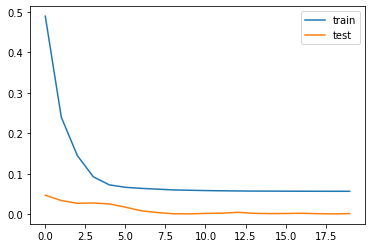

In [27]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [28]:
from numpy import concatenate
from math import sqrt
from sklearn.metrics import mean_squared_error
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
# print(test_X)

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], n_hours*n_features))
print(yhat)
# print(test_X[:, -n_features+1:])

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, -n_features+1:]), axis=1)
print(inv_yhat)

# inv_yhat = yhat.reshape(-1,1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
print(inv_yhat)
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, -n_features+1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

[[0.6212518 ]
 [0.6207271 ]
 [0.62038976]
 ...
 [0.42108333]
 [0.42161942]
 [0.42021018]]
[[0.6212518  0.71632445]
 [0.6207271  0.71632445]
 [0.62038976 0.71632445]
 ...
 [0.42108333 0.381518  ]
 [0.42161942 0.381518  ]
 [0.42021018 0.381518  ]]
[1.3059912 1.3055875 1.3053279 ... 1.1519815 1.1523939 1.1513097]
Test RMSE: 0.035


(8777, 1)
              Close
Date               
2014-04-22  1.38068
2014-04-23  1.38167
2014-04-24  1.38302
2014-04-25  1.38330
2014-04-27  1.38387
...             ...
2019-12-31  1.12154
2020-01-02  1.11712
2020-01-03  1.11564
2020-01-06  1.11953
2020-01-07  1.11429

[1776 rows x 1 columns]
(1776,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


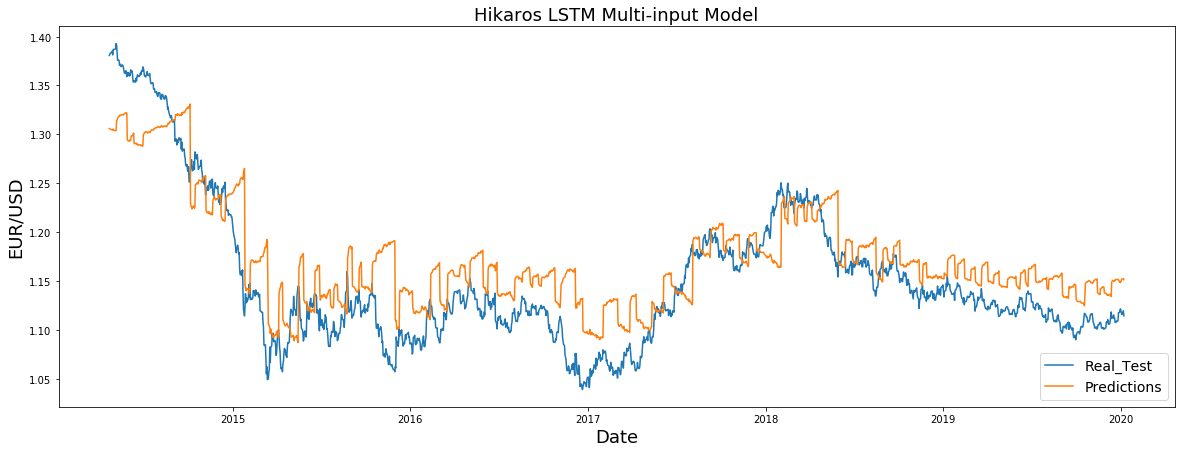

In [29]:
#Plot the data
data = dataset.filter(["Close"])
print(data.shape)
train = data[:n_train_hours]
valid = data[n_train_hours+n_hours:]
print(valid)
print(inv_yhat.shape)
valid['Predictions'] = inv_yhat
# print(valid)
#Visualize the data
plt.figure(figsize=(20,7))
plt.title('Hikaros LSTM Multi-input Model',fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('EUR/USD', fontsize=18)
# plt.plot(train[symbol])
# plt.plot(train)
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Real_Test", 'Predictions'], loc='lower right' , fontsize=14)
plt.show()

(1776, 1)
(1776,)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


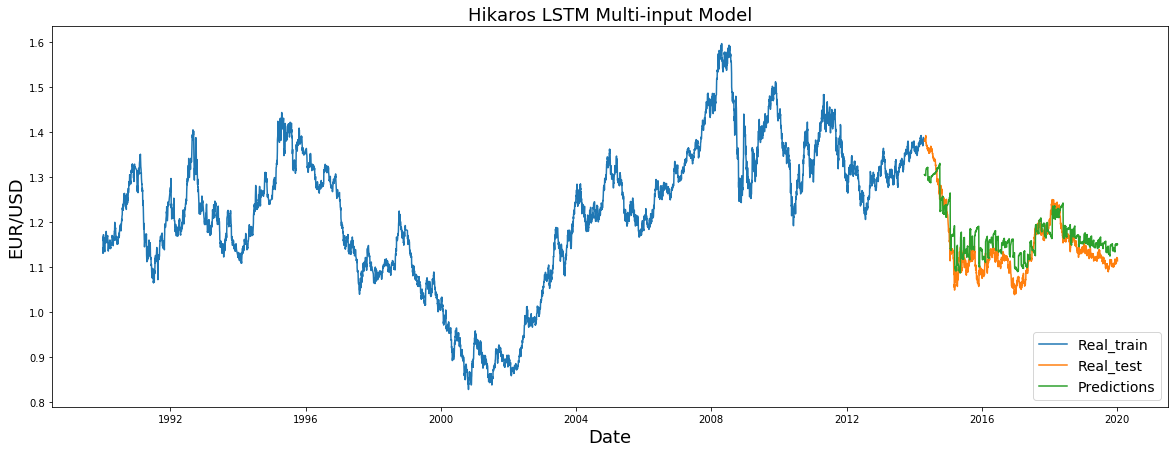

In [30]:
#Plot the data
data = dataset.filter(["Close"])
train = data[:n_train_hours]
valid = data[n_train_hours+n_hours:]
print(valid.shape)
print(inv_yhat.shape)
valid['Predictions'] = inv_yhat
# print(valid)
#Visualize the data
plt.figure(figsize=(20,7))
plt.title('Hikaros LSTM Multi-input Model',fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('EUR/USD', fontsize=18)
# plt.plot(train[symbol])
plt.plot(train)
plt.plot(valid[["Close","Predictions"]])
plt.legend(["Real_train",'Real_test', 'Predictions'], loc='lower right', fontsize=14)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


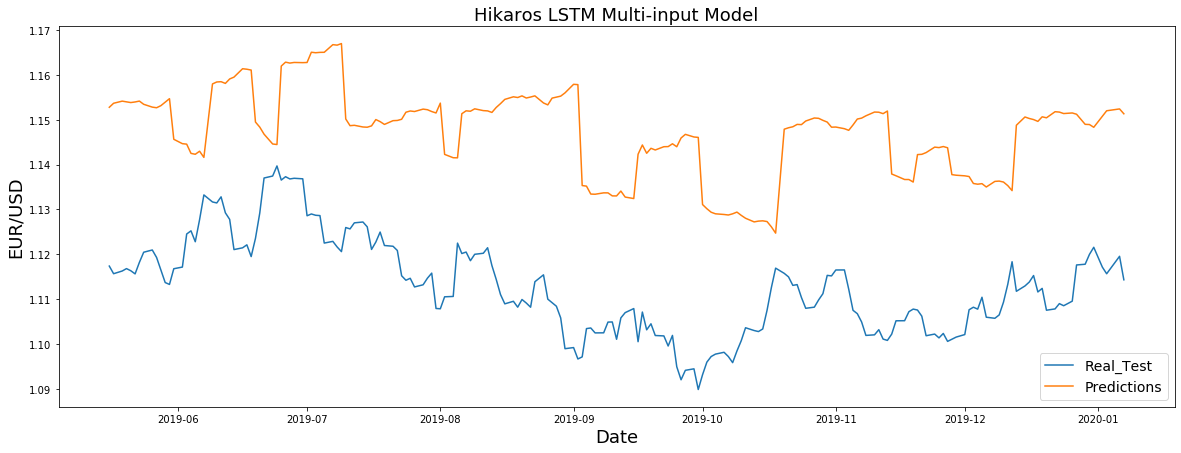

In [31]:
#Plot the data
data = dataset.filter(["Close"])
train = data[:n_train_hours]
valid = data[n_train_hours+n_hours:]
valid['Predictions'] = inv_yhat
# print(valid)
#Visualize the data
plt.figure(figsize=(20,7))
plt.title('Hikaros LSTM Multi-input Model',fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('EUR/USD', fontsize=18)
# plt.plot(train[symbol])
# plt.plot(train)
plt.plot(valid[["Close","Predictions"]][-200:])
plt.legend(["Real_Test", 'Predictions'], loc='lower right',fontsize=14)
plt.show()